<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [49]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [50]:
#1.1
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num = df_num.fillna(df_num.mean())
scaler = MinMaxScaler()
df_num_norma = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=df_num.columns
)
df_num_norma.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  float64
 1   desplazamiento        36791 non-null  float64
 2   cilindros             36791 non-null  float64
 3   co2                   36791 non-null  float64
 4   consumo_litros_milla  36791 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [51]:
#1.2
df_ca = df.select_dtypes(include=['object'])
df_ca_cod = pd.get_dummies(df_ca, drop_first=True)
df_ca_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   clase_tipo_Coche Familiar                    36791 non-null  bool 
 1   clase_tipo_Coches Grandes                    36791 non-null  bool 
 2   clase_tipo_Coches Medianos                   36791 non-null  bool 
 3   clase_tipo_Coches pequeños                   36791 non-null  bool 
 4   clase_tipo_Deportivos                        36791 non-null  bool 
 5   clase_tipo_Furgoneta                         36791 non-null  bool 
 6   clase_tipo_Vehículos Especiales              36791 non-null  bool 
 7   traccion_tipo_dos                            36791 non-null  bool 
 8   transmision_tipo_Manual                      36791 non-null  bool 
 9   combustible_tipo_Normal                      36791 non-null  bool 
 10  combustible_tipo_Otros

In [52]:
#1.3
df_procesado = pd.concat([df_num_norma, df_ca_cod], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,...,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         36791 non-null  float64
 1   desplazamiento                               36791 non-null  float64
 2   cilindros                                    36791 non-null  float64
 3   co2                                          36791 non-null  float64
 4   consumo_litros_milla                         36791 non-null  float64
 5   clase_tipo_Coche Familiar                    36791 non-null  bool   
 6   clase_tipo_Coches Grandes                    36791 non-null  bool   
 7   clase_tipo_Coches Medianos                   36791 non-null  bool   
 8   clase_tipo_Coches pequeños                   36791 non-null  bool   
 9   clase_tipo_Deportivos                        36791 non-null  bool   
 10

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [54]:
#2.1
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_procesado)

df_procesado['cluster'] = kmeans.labels_

In [55]:
#2.2
columnas_num = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
promedios_cluster = df_procesado.groupby('cluster')[columnas_num].mean()
promedios_cluster


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.479569,0.450555,0.325965,0.404752,0.335839
1,0.582925,0.361428,0.299330,0.355229,0.283377
2,0.795182,0.180480,0.157958,0.239389,0.155183
3,0.361956,0.501749,0.359717,0.496465,0.440472
4,0.503185,0.166417,0.142465,0.242108,0.157569
5,0.450178,0.628509,0.462961,0.513979,0.455688
6,0.521699,0.249676,0.194524,0.304652,0.227134
7,0.409018,0.330589,0.256466,0.354500,0.282657


In [56]:
#2.2
moda_num = df_procesado.groupby('cluster')[columnas_num].agg(lambda x: x.mode().iloc[0])
moda_num.columns = [col + '_moda' for col in moda_num.columns]
moda_num

,year_moda,desplazamiento_moda,cilindros_moda,co2_moda,consumo_litros_milla_moda
cluster,,,,,
0,0.029412,0.474359,0.285714,0.424351,0.331027
1,0.617647,0.307692,0.285714,0.374603,0.281734
2,0.970588,0.179487,0.142857,0.275108,0.194444
3,0.000000,0.474359,0.428571,0.454199,0.393464
4,0.941176,0.179487,0.142857,0.275108,0.194444
5,0.000000,0.564103,0.428571,0.488312,0.431373
6,0.823529,0.179487,0.142857,0.317749,0.241830
7,0.088235,0.307692,0.285714,0.374603,0.305011


In [57]:
#2.3
resumen_cluster = pd.concat([promedios_cluster, moda_num], axis=1)
resumen_cluster

,year,desplazamiento,cilindros,co2,consumo_litros_milla,year_moda,desplazamiento_moda,cilindros_moda,co2_moda,consumo_litros_milla_moda
cluster,,,,,,,,,,
0,0.479569,0.450555,0.325965,0.404752,0.335839,0.029412,0.474359,0.285714,0.424351,0.331027
1,0.582925,0.361428,0.299330,0.355229,0.283377,0.617647,0.307692,0.285714,0.374603,0.281734
2,0.795182,0.180480,0.157958,0.239389,0.155183,0.970588,0.179487,0.142857,0.275108,0.194444
3,0.361956,0.501749,0.359717,0.496465,0.440472,0.000000,0.474359,0.428571,0.454199,0.393464
4,0.503185,0.166417,0.142465,0.242108,0.157569,0.941176,0.179487,0.142857,0.275108,0.194444
5,0.450178,0.628509,0.462961,0.513979,0.455688,0.000000,0.564103,0.428571,0.488312,0.431373
6,0.521699,0.249676,0.194524,0.304652,0.227134,0.823529,0.179487,0.142857,0.317749,0.241830
7,0.409018,0.330589,0.256466,0.354500,0.282657,0.088235,0.307692,0.285714,0.374603,0.305011


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [58]:
#3
Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
score = []
for k in Nc:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df_procesado)
    score.append(km.inertia_)

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})
df_Elbow


,Number of Clusters,Score
0,5,94558.887026
1,10,63034.769078
2,20,48653.255067
3,30,41634.749944
4,50,33749.032527
5,75,26741.707004
6,100,22048.789072
7,200,12422.522375
8,300,8020.511904


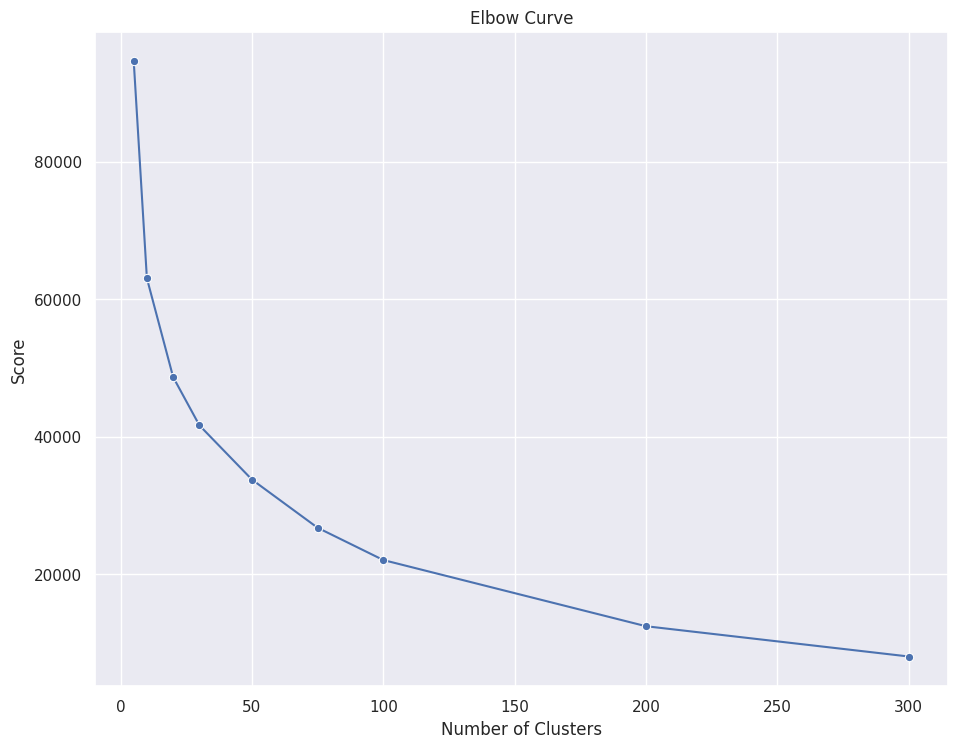

In [59]:
#3 Grafico
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters", y="Score", data=df_Elbow, marker='o')
sns.scatterplot(x="Number of Clusters", y="Score", data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

####Analisis del gráfico:
La inercia disminuye rápidamente al principio, entre 5 y aproximadamente 50 clusters, lo que muestra que agregar clusters en este rango mejora significativamente la compactación de los grupos. A partir de unos 50 clusters, la reducción de la inercia se vuelve mucho más lenta y la curva comienza a aplanarse. Entre 50 y 100 clusters la caída es más gradual, y después de 100 a 200 clusters la inercia prácticamente se estabiliza. Por lo tanto, un número práctico de clusters para este caso sería alrededor de 50, equilibrando reducción de inercia.



## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset *Wine*.



In [60]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [61]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



    Componente  Varianza Explicada  Varianza Acumulada
0            1            0.361988            0.361988
1            2            0.192075            0.554063
2            3            0.111236            0.665300
3            4            0.070690            0.735990
4            5            0.065633            0.801623
5            6            0.049358            0.850981
6            7            0.042387            0.893368
7            8            0.026807            0.920175
8            9            0.022222            0.942397
9           10            0.019300            0.961697
10          11            0.017368            0.979066
11          12            0.012982            0.992048
12          13            0.007952            1.000000


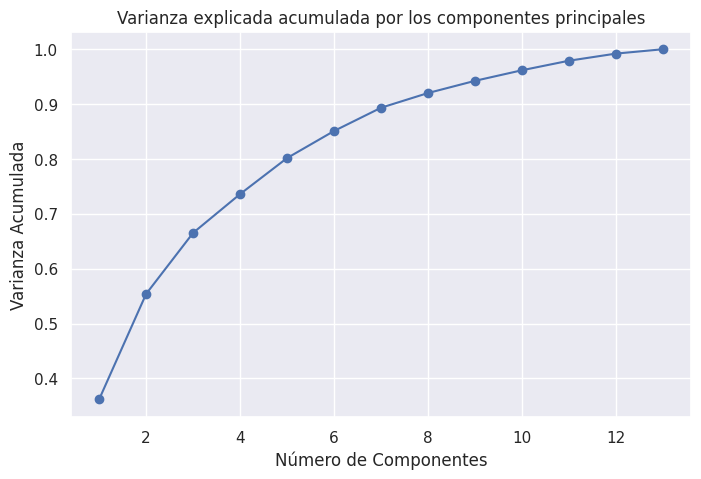

In [62]:
#1.1
from sklearn.preprocessing import StandardScaler

pca_full = PCA()
X = wine.drop(columns=[target])
X_scaled = StandardScaler().fit_transform(X)
X_pca_full = pca_full.fit_transform(X_scaled)
var_exp = pca_full.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)
df_varianza = pd.DataFrame({
    'Componente': np.arange(1, len(var_exp) + 1),
    'Varianza Explicada': var_exp,
    'Varianza Acumulada': var_exp_acum
})
print(df_varianza)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_exp_acum) + 1), var_exp_acum, marker='o')
plt.title("Varianza explicada acumulada por los componentes principales")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid(True)
plt.show()

Respuesta:

Para capturar al menos el 90–95% de la información, se necesitan de 8 a 9 componentes




Componentes principales:
        PC1       PC2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831

Varianza explicada por cada componente principal:
[0.36198848 0.1920749 ]


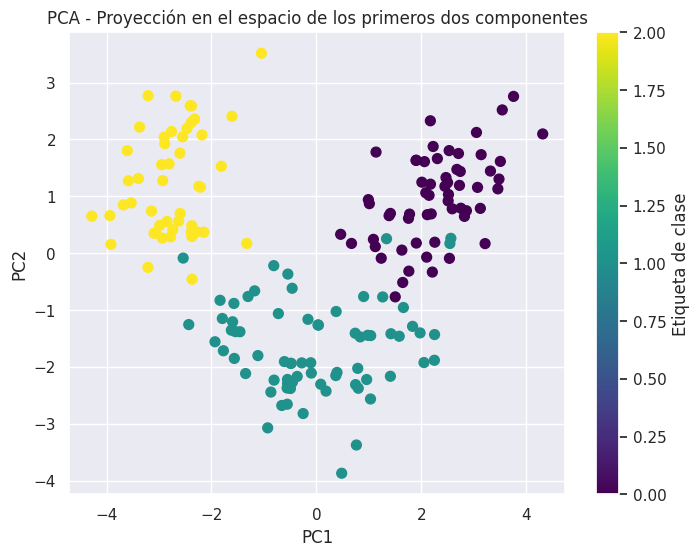

In [63]:
#1.2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("\nComponentes principales:")
print(df_pca.head())

print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', s=50)
plt.title("PCA - Proyección en el espacio de los primeros dos componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Etiqueta de clase')
plt.show()


In [64]:
#1.3
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("Loadings de las variables en los dos primeros componentes:")
print(loadings)


Loadings de las variables en los dos primeros componentes:
                                   PC1       PC2
alcohol                       0.144329  0.483652
malic_acid                   -0.245188  0.224931
ash                          -0.002051  0.316069
alcalinity_of_ash            -0.239320 -0.010591
magnesium                     0.141992  0.299634
total_phenols                 0.394661  0.065040
flavanoids                    0.422934 -0.003360
nonflavanoid_phenols         -0.298533  0.028779
proanthocyanins               0.313429  0.039302
color_intensity              -0.088617  0.529996
hue                           0.296715 -0.279235
od280/od315_of_diluted_wines  0.376167 -0.164496
proline                       0.286752  0.364903


Repsuesta:

Para PC1, las variables con mayor influencia (valores absolutos más altos) son flavanoids, total_phenols, od280/od315_of_diluted_wines, y proanthocyanins.

Para PC2, las variables con mayor influencia son color_intensity y alcohol, ambas con loadings positivos considerables.

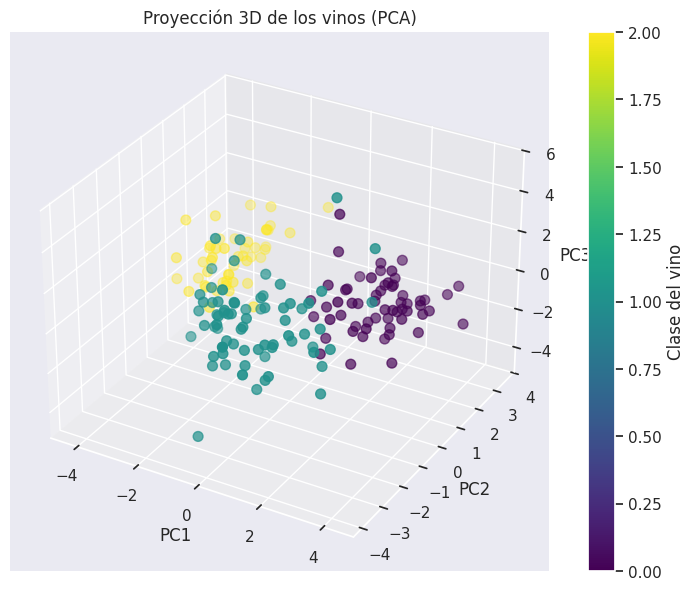

In [65]:
#1.4
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
    c=y, cmap='viridis', s=50
)
ax.set_title("Proyección 3D de los vinos (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter, label='Clase del vino')
plt.show()

Respuesta:  

Se aprecian tres grupos distintos, aunque hay cierta superposición entre ellos. La Clase 0 y la Clase 2 parecen estar mejor separadas la Clase 1.



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


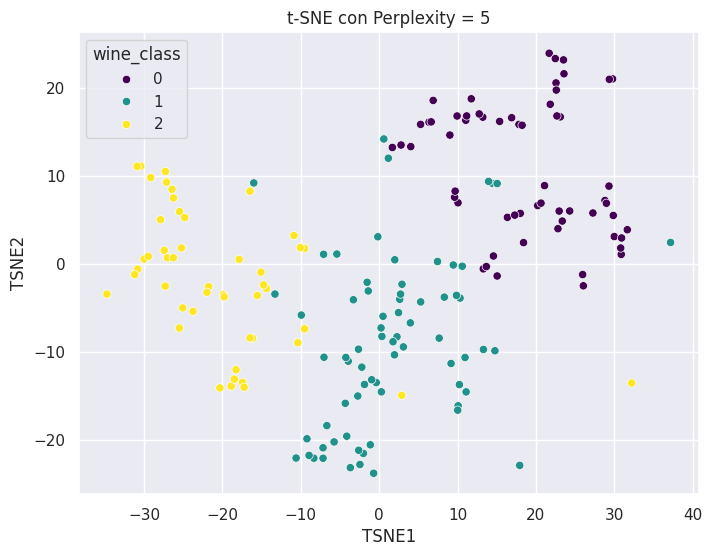

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


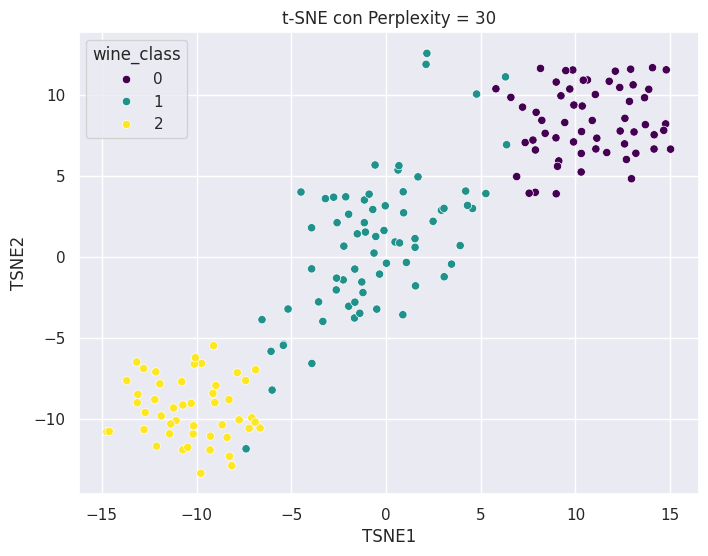

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


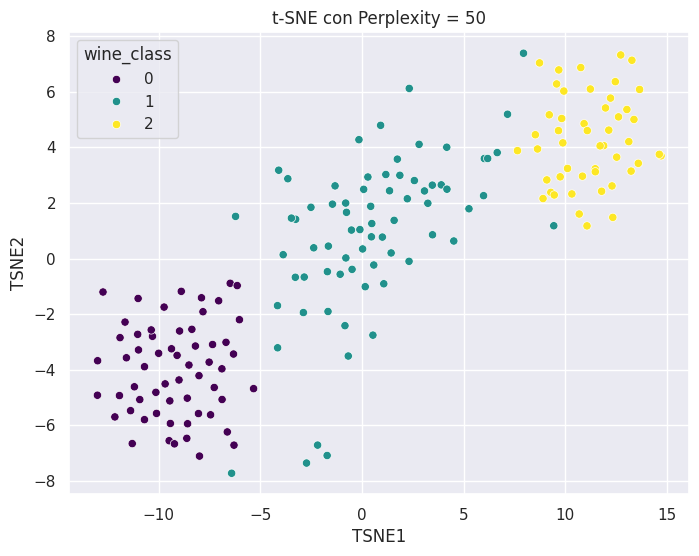

In [66]:
#2.1
perplexities = [5, 30, 50]
learning_rate = 200

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42, n_iter=300)
    X_tsne = tsne.fit_transform(X_scaled)

    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['wine_class'] = y

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='wine_class', data=df_tsne, palette='viridis')
    plt.title(f't-SNE con Perplexity = {perplexity}')
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.show()

####Respuesta:
Para una perplexity baja (5), hace que la visualización se enfoque en las relaciones locales, resultando en grupos fragmentados y la posible formación de pequeños cúmulos.
Una perplexity de 30 ofrece un equilibrio ideal, mostrando los grupos de vinos bien definidos. Una perplexity de 50 produce grupos más compactos que pueden revelar mejor la estructura global, pero con el riesgo de distorsionarla si es demasiado alta.

En cuanto a cómo los hiperparámetros afectan la estructura de los clústeres, la perplexity influye directamente en cómo se ponderan los vecinos cercanos y lejanos. Un valor bajo resalta las estructuras locales pero puede ignorar las conexiones globales, mientras que uno alto puede revelar mejor la estructura global pero corre el riesgo de agrupar puntos que no están realmente próximos.

Finalmente, respecto a las agrupaciones de las tres clases de vinos y sus relaciones no lineales, en las visualizaciones de t-SNE se ve que las clases forman agrupaciones claras y separadas, especialmente con perplexities de 30 y 50. t-SNE suele ser más efectivo que PCA para este tipo de datos porque, mientras PCA se basa en una transformación lineal buscando direcciones de máxima varianza, t-SNE preserva las relaciones de vecindad no lineales: intenta mantener cercanos en la visualización los puntos que estaban cerca en el espacio original, y lejos los que estaban lejos.



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



####Respuesta:
3.1: Al comparar PCA y t-SNE se observan diferencias clave en su enfoque y aplicación. PCA,es un método lineal eficiente y fácil de interpretar,
donde las componentes principales son combinaciones lineales de las variables originales, lo que permite identificar qué variables contribuyen más a la varianza y reducir el ruido. Sin embargo, al ser lineal, puede no captar estructuras no lineales en los datos, por lo que las clases que se separan de forma compleja podrían no visualizarse claramente. Por su parte, t-SNE es un método no lineal diseñado para visualizar datos de alta dimensión, preservando relaciones de vecindad entre puntos y mostrando clústeres de manera más evidente incluso cuando la separación es no lineal. Su principal limitación es que es más costoso computacionalmente, las dimensiones resultantes no son fácilmente interpretables y los resultados dependen fuertemente de los hiperparámetros, siendo las
distancias absolutas menos significativas que las relaciones locales entre puntos.

3.2: En cuanto a su uso, PCA es recomendable cuando la interpretabilidad es importante, por ejemplo para entender qué variables impulsan la varianza o como preprocesamiento antes de aplicar otros algoritmos de aprendizaje automático, mientras que t-SNE es ideal para explorar visualmente los datos y detectar clústeres, aunque no se suele usar para alimentar modelos debido a su complejidad y la dificultad de interpretar sus dimensiones.

3.3: La reducción de dimensionalidad es especialmente importante en datasets de alta dimensión, como el Wine dataset con 13 variables, porque permite visualizar patrones que serían imposibles de ver directamente en el espacio original. Al reducir la dimensionalidad a 2D o 3D, se pueden identificar clústeres o separaciones entre grupos, como las distintas variedades de vino, y entender mejor la estructura de los datos. Además, ayuda a reducir la complejidad y eliminar ruido o información redundante, quedándose con las características más relevantes que explican la mayor parte de la varianza o preservan relaciones importantes. Esto no solo mejora el rendimiento de algoritmos de aprendizaje automático posteriores, sino que también facilita la interpretación y comunicación de los resultados, ya que los patrones y relaciones en un espacio reducido son mucho más fáciles de visualizar y explicar a otros.